<a href="https://colab.research.google.com/github/Abhimokashe/Decision-Tree-classifier/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv.zip')

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
numerical_features = df.describe(include='float').columns
numerical_features

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [ ]:
categorical_features = df.describe(include='O').columns
categorical_features

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.drop('Date',axis=1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
inf_data = [(index,i) for index,i in enumerate(df['RainTomorrow']) if pd.isna(i)]

In [ ]:
y_inf = pd.DataFrame(inf_data).set_index(0)
y_inf

,1
0,
14,NaN
283,NaN
435,NaN
437,NaN
443,NaN
...,...
144955,NaN
145091,NaN
145092,NaN


In [ ]:
index_of_inf = y_inf.index.tolist()

In [ ]:
x_inf = df.iloc[index_of_inf]
x_inf

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,...,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,...,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,...,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,2010-02-11,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,...,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,2010-02-17,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,...,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,2016-02-07,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,...,22.0,11.0,1012.6,1009.6,NaN,NaN,28.8,37.2,No,NaN
145091,2016-06-22,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,...,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,No,NaN
145092,2016-06-23,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,...,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN
145335,2017-02-21,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,...,23.0,11.0,1013.7,1008.4,NaN,NaN,25.2,34.4,No,NaN


In [ ]:
a = []
for i in range(df.shape[0]):
  if i not in index_of_inf:
    a.append(i)

In [ ]:
x_actual = df.iloc[a]
x_actual

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [ ]:
y_actual = x_actual['RainTomorrow']

In [ ]:
x_act = x_actual.drop(['Date','RainTomorrow'],axis=1)

**Missing value treatment**

In [ ]:
x_act = x_act.fillna(method = 'ffill',axis=0).fillna(method = 'bfill',axis=0)

In [ ]:
x_act

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,No
1,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,8.0,2.0,17.2,24.3,No
2,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,8.0,2.0,18.1,26.5,No
4,Albury,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,6.4,10.7,E,31.0,ESE,E,...,13.0,59.0,27.0,1024.7,1021.2,8.0,7.0,9.4,20.9,No
145455,Uluru,2.8,23.4,0.0,6.4,10.7,E,31.0,SE,ENE,...,11.0,51.0,24.0,1024.6,1020.3,8.0,7.0,10.1,22.4,No
145456,Uluru,3.6,25.3,0.0,6.4,10.7,NNW,22.0,SE,N,...,9.0,56.0,21.0,1023.5,1019.1,8.0,7.0,10.9,24.5,No
145457,Uluru,5.4,26.9,0.0,6.4,10.7,N,37.0,SE,WNW,...,9.0,53.0,24.0,1021.0,1016.8,8.0,7.0,12.5,26.1,No


In [ ]:
x_act.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

**Label Encoding**

In [ ]:
x_act.describe(include='O').columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [ ]:
from sklearn import preprocessing
L_encoder = preprocessing.LabelEncoder()

In [ ]:
x_act['Location'] = L_encoder.fit_transform(x_act['Location'])

In [ ]:
x_act['Location'].unique()

array([ 2,  4, 10, 11, 21, 24, 26, 27, 30, 34, 37, 38, 42, 45, 47,  9, 40,
       23,  5,  6, 35, 19, 18, 20, 25, 33, 44, 12,  7,  8, 14, 39,  0, 22,
       28, 48,  1, 46, 29, 32, 31, 36, 43, 15, 17,  3, 13, 16, 41])

In [ ]:
x_act['WindGustDir'] = L_encoder.fit_transform(x_act['WindGustDir'])
x_act['WindDir9am'] = L_encoder.fit_transform(x_act['WindDir9am'])
x_act['WindDir3pm'] = L_encoder.fit_transform(x_act['WindDir3pm'])
x_act['RainToday'] = L_encoder.fit_transform(x_act['RainToday'])

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(x_act)
scaled_data = model.transform(x_act)

In [ ]:
df_mod = pd.DataFrame(scaled_data)

In [ ]:
X = df_mod
y = y_actual

# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [ ]:
# Check the shape of X_train and X_test
X_train.shape,X_test.shape

((113754, 21), (28439, 21))

# Model training

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Creating the classifier object
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=100, min_samples_leaf=5)

# Performing training
clf_gini = clf_gini.fit(X_train,y_train)

# Prediction using gini
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
y_pred_gini

array(['No', 'Yes', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [ ]:
print("Confusion_Matrix: ", confusion_matrix(y_test,y_pred_gini))
print("Accuracy: ", accuracy_score(y_test,y_pred_gini)*100)
print("Report: ", classification_report(y_test,y_pred_gini))

Confusion_Matrix:  [[19500  2567]
 [ 3038  3334]]
Accuracy:  80.29114947782973
Report:                precision    recall  f1-score   support

          No       0.87      0.88      0.87     22067
         Yes       0.56      0.52      0.54      6372

    accuracy                           0.80     28439
   macro avg       0.72      0.70      0.71     28439
weighted avg       0.80      0.80      0.80     28439



In [ ]:
# Creating classifier object
clf_entropy = DecisionTreeClassifier(criterion='entropy',random_state=100,min_samples_leaf=5)

# Performing training
clf_entropy.fit(X_train,y_train)

# Prediction using entropy
y_pred_entropy = clf_entropy.predict(X_test)
y_pred_entropy

array(['No', 'No', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

In [ ]:
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred_entropy))
print("Accuracy: ", accuracy_score(y_test,y_pred_entropy)*100)
print("Report: ", classification_report(y_test,y_pred_entropy))

Confusion Matrix:  [[19304  2763]
 [ 2952  3420]]
Accuracy:  79.90435669327333
Report:                precision    recall  f1-score   support

          No       0.87      0.87      0.87     22067
         Yes       0.55      0.54      0.54      6372

    accuracy                           0.80     28439
   macro avg       0.71      0.71      0.71     28439
weighted avg       0.80      0.80      0.80     28439



In [53]:
# Model score 

cls = DecisionTreeClassifier(max_depth=6,random_state=1)
cls.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [51]:
# Checking model score using test data
cls.score(X_test,y_test)

0.8395513203699145

[Text(0.5, 0.9285714285714286, 'x[13] <= 0.963\ngini = 0.348\nsamples = 113754\nvalue = [88249, 25505]'),
 Text(0.25, 0.7857142857142857, 'x[13] <= 0.198\ngini = 0.249\nsamples = 94615\nvalue = [80856, 13759]'),
 Text(0.125, 0.6428571428571429, 'x[7] <= 0.999\ngini = 0.171\nsamples = 64663\nvalue = [58572, 6091]'),
 Text(0.0625, 0.5, 'x[3] <= -0.225\ngini = 0.135\nsamples = 55625\nvalue = [51576, 4049]'),
 Text(0.03125, 0.35714285714285715, 'x[15] <= -0.738\ngini = 0.116\nsamples = 48596\nvalue = [45598, 2998]'),
 Text(0.015625, 0.21428571428571427, 'x[5] <= 0.488\ngini = 0.206\nsamples = 8272\nvalue = [7309, 963]'),
 Text(0.0078125, 0.07142857142857142, 'gini = 0.313\nsamples = 3186\nvalue = [2567, 619]'),
 Text(0.0234375, 0.07142857142857142, 'gini = 0.126\nsamples = 5086\nvalue = [4742, 344]'),
 Text(0.046875, 0.21428571428571427, 'x[5] <= 0.929\ngini = 0.096\nsamples = 40324\nvalue = [38289, 2035]'),
 Text(0.0390625, 0.07142857142857142, 'gini = 0.118\nsamples = 28906\nvalue = [270

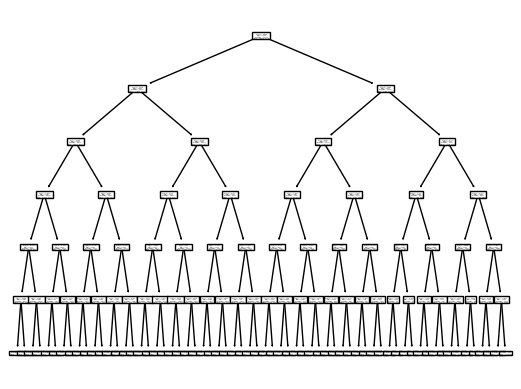

In [54]:
from sklearn import tree
import graphviz

tree.plot_tree(cls)

In [55]:
# Exporting Decision Tree
dot_data = tree.export_graphviz(cls,out_file=None)
graph = graphviz.Source(dot_data)
graph.render("AUS_weather_decision_tree")

'AUS_weather_decision_tree.pdf'

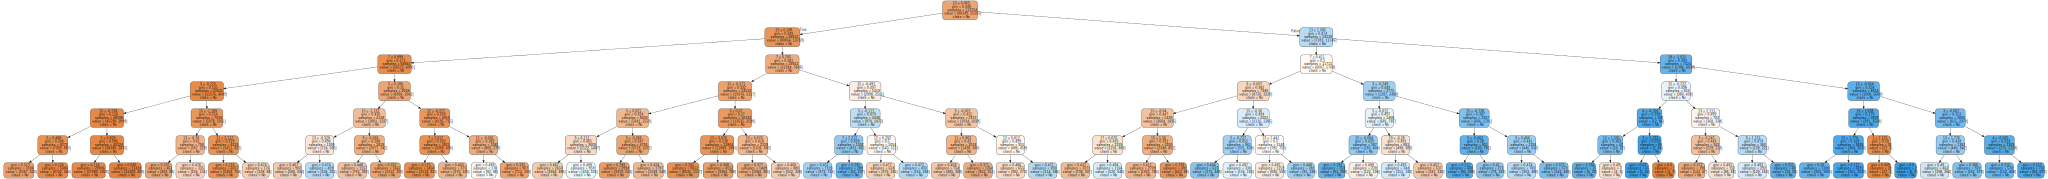

In [56]:
dot_data = tree.export_graphviz(cls,out_file=None,feature_names=X.columns,class_names = y,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph